<a href="https://colab.research.google.com/github/constantinembufung/CNN-classifier-for-cats-and-dogs/blob/master/implementing_a_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
X = tf.Variable([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], tf.float32)
Y = tf.Variable([0,1,1,1], dtype = tf.float32)
print(X)
Y = tf.reshape(Y, [4,1])
print(Y)

<tf.Variable 'Variable:0' shape=(4, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)>
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)


In [ ]:
NUM_FEATURES = X.shape[1]
OUTPUT_SIZE = 1
W = tf.Variable(tf.zeros([NUM_FEATURES, OUTPUT_SIZE ]),tf.float32)
print(W)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>


In [ ]:
B = tf.Variable(tf.zeros([OUTPUT_SIZE, 1]), tf.float32)
print(B)


<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>


In [ ]:
output = tf.sigmoid(z)
output

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)>

PERCEPTION IN TENSORFLOW

In [ ]:
def perception(X):
  z = tf.add(tf.matmul(X,W),B)
  output = tf.sigmoid(z)
  return output

print(perception(X))

tf.Tensor(
[[0.5]
 [0.5]
 [0.5]
 [0.5]], shape=(4, 1), dtype=float32)


In [ ]:
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

no_of_epochs = 1000
for n in range(no_of_epochs):
  loss = lambda:abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,
                                                             logits=perception(X))))
  optimizer.minimize(loss,[W,B])

In [ ]:
** Implementing a Binary Classifier**

** Implementing a Binary Classifier**


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [ ]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(21, 3)


,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


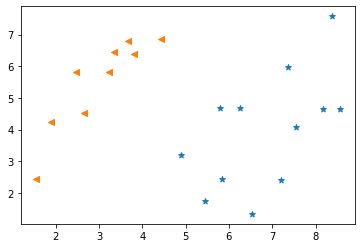

In [ ]:
plt.scatter(df[df['label'] == 0]['x1'], df[df['label']== 0]['x2'], marker='*')
plt.scatter(df[df['label'] == 1]['x1'], df[df['label'] == 1]['x2'], marker='<')

In [ ]:
X_input = df[['x1','x2']].values
y_label = df[['label']].values

In [ ]:
x = tf.Variable(X_input, dtype=tf.float32)
y = tf.Variable(y_label, dtype=tf.float32)

In [ ]:
Number_of_features = 2
Number_of_units = 1
learning_rate = 0.01

# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))

#optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def perceptron(x):
    z = tf.add(tf.matmul(x,weight),bias)
    output = tf.sigmoid(z)
    return output

def train(i):
    for n in range(i):
        loss = lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])
 
#Train the perceptron
train(1000)

In [ ]:
tf.print(weight, bias)

[[-0.844034076]
 [0.673354685]] [0.059394788]


In [ ]:
ypred = perceptron(x)

In [ ]:
ypred = tf.round(ypred)

In [ ]:

acc = accuracy_score(y.numpy(), ypred.numpy())
print(acc)

1.0


In [ ]:
cnf_matrix = confusion_matrix(y.numpy(), ypred.numpy())
print(cnf_matrix)

[[12  0]
 [ 0  9]]


**Implementing Multiclass Classification using a perception**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas import get_dummies


In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,petallength,petalwidth,sepallength,sepalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


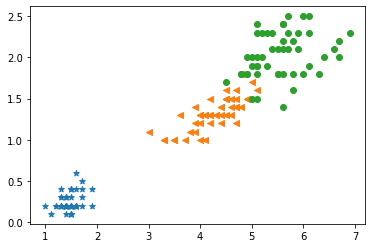

In [ ]:
plt.scatter(df[df['species'] == 0]['sepallength'], df[df['species'] == 0]['sepalwidth'], marker='*')
plt.scatter(df[df['species'] == 1]['sepallength'], df[df['species'] == 1]['sepalwidth'], marker='<')
plt.scatter(df[df['species'] == 2]['sepallength'], df[df['species'] == 2]['sepalwidth'], marker='o')

In [ ]:
x = df[['petallength','petalwidth','sepallength','sepalwidth']].values
y = df['species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y = get_dummies(y)
y = y.values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
x = tf.Variable(x, dtype=tf.float32)

In [ ]:
Number_of_features = 4
Number_of_units = 3 
 
# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))
 
def perceptron(x):
    z = tf.add(tf.matmul(x, weight), bias)
    output = tf.nn.softmax(z)
    return output

In [ ]:
optimizer = tf.optimizers.Adam(.01)

In [ ]:
def train(i):
    for n in range(i):
        loss=lambda: abs(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
  labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])

In [ ]:
train(1000)
tf.print(weight)

[[0.68431 0.895632744 -1.01323462]
 [2.6424644 -1.13437772 -3.20665407]
 [-2.96634197 -0.129377574 3.25728416]
 [-2.97383833 -3.13501668 3.23136568]]


In [ ]:
ypred=perceptron(x)
ypred=tf.round(ypred)
accuracy_score(y, ypred)

0.98

MNIST multiclassifier


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import get_dummies


In [ ]:

mnist = tf.keras.datasets.mnist

In [ ]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
train_features, test_features = train_features / 255.0, test_features / 255.0

In [ ]:
x = tf.reshape(train_features,[60000, 784])

In [ ]:
x = tf.Variable(x)
x = tf.cast(x, tf.float32)

In [ ]:
y_hot = get_dummies(train_labels)
y = y_hot.values

In [ ]:
#defining the parameters
Number_of_features = 784
Number_of_units = 10  
# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))
bias = tf.Variable(tf.zeros([Number_of_units]))

In [ ]:
#perceptron definition
def perceptron(x):
    z = tf.add(tf.matmul(x,weight),bias)
    output = tf.nn.softmax(z)
    return output
 
 #optimizer
optimizer = tf.optimizers.Adam(.01)
 
#training definition
def train(i):
    for n in range(i):
        loss=lambda: abs(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])
 
#Train the network
train(1000)

In [ ]:
# Prepare the test data to measure the accuracy. 
test = tf.reshape(test_features, [10000, 784])
test = tf.Variable(test)
test = tf.cast(test, tf.float32)
test_hot = get_dummies(test_labels)
test_matrix = test_hot.values

In [ ]:
ypred = perceptron(test)
ypred = tf.round(ypred)

In [ ]:
accuracy_score(test_hot, ypred)

0.9304

**Binary Classification Using Keras**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('data.csv')
df.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


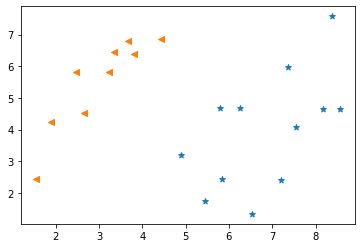

In [ ]:
plt.scatter(df[df['label'] == 0]['x1'], df[df['label'] == 0]['x2'], marker='*')
plt.scatter(df[df['label'] == 1]['x1'], df[df['label'] == 1]['x2'], marker='<')

In [ ]:
x_input = df[['x1','x2']].values
y_label = df[['label']].values

In [ ]:
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
 metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_input, y_label, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6200 - accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6176 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6153 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.6129 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6106 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6082 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6059 - accuracy: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.6035 - accuracy: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6012 - accuracy: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.5988 - 

In [ ]:
model.evaluate(x_input, y_label)

1/1 [==============================] - 0s 1ms/step - loss: 0.3867 - accuracy: 0.9048


[0.38672393560409546, 0.9047619104385376]

**KERAS IMPLEMENTATION OF MNIST DATASET**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#keras liberies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


**Load the MNIST data**

In [ ]:
mnist = tf.keras.datasets.mnist
(train_features, train_labels),(test_features, test_labels) = mnist.load_data()
train_features.shape

(60000, 28, 28)

In [ ]:
train_features, test_features = train_features / 255.0, test_features / 255.0


In [ ]:
#build the model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=20, activation = 'relu'))
model.add(Dropout(.20))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_features, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3038 - accuracy: 0.5597
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7559 - accuracy: 0.7515
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6465 - accuracy: 0.7958
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5820 - accuracy: 0.8235
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5347 - accuracy: 0.8413
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4922 - accuracy: 0.8562
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4565 - accuracy: 0.8671
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4292 - accuracy: 0.8749
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4053 - accuracy: 0.8801
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.386

In [ ]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 800us/step - loss: 0.1393 - accuracy: 0.9600


[0.13933902978897095, 0.9599999785423279]

In [ ]:
#load random images fromthe dataset and test the model
loc = 10
test_image = test_features[loc]
test_image.shape

(28, 28)

In [ ]:
test_image = test_image.reshape(1,28,28)

In [ ]:
test_image.shape

(1, 28, 28)

In [ ]:
result = model.predict(test_image)
print(result)

[[9.9913776e-01 1.7210574e-13 2.9351786e-04 5.7910221e-08 1.4821022e-10
  5.1248452e-04 5.5324050e-05 8.1301778e-07 4.1863676e-10 1.0084115e-08]]


In [ ]:
result.argmax()

0

In [ ]:
test_labels[loc]

0

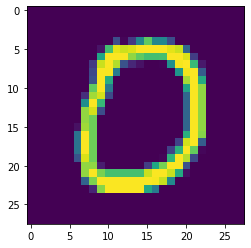

In [ ]:
plt.imshow(test_features[loc])

**Keras Implementation of Sonar dataset**

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('sonar.csv')
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [ ]:
X_input = df.iloc[:, :-1]
Y_label = df['Class'].values

In [ ]:
labelencoder_Y = LabelEncoder() 
Y_label = labelencoder_Y.fit_transform(Y_label)
Y_label = Y_label.reshape([208, 1])

In [ ]:
model = Sequential()
model.add(Dense(300,input_dim=60, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',
  metrics=['accuracy'])

In [ ]:
model.fit(X_input, Y_label, epochs=30)

Epoch 1/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5192
Epoch 2/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6490
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.7837
Epoch 4/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.8029
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8173
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7596
Epoch 7/30
7/7 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8125
Epoch 8/30
7/7 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8606
Epoch 9/30
7/7 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8750
Epoch 10/30
7/7 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8750
Epoch 11/30
7/7 [======================

In [ ]:
model.evaluate(X_input, Y_label)

7/7 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 1.0000


[0.025134406983852386, 1.0]

In [ ]:
A = tf.Variable([[1,2,3],[4,5,6],[7,8,9]])
A

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [ ]:
B = tf.Variable([[1,0,-1],[1,0,-1],[1,0,-1]])
B

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]], dtype=int32)>

In [ ]:
mult_out = tf.math.multiply(A,B)
mult_out

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  0, -3],
       [ 4,  0, -6],
       [ 7,  0, -9]], dtype=int32)>

In [ ]:
conv_out = tf.math.reduce_sum(mult_out)
conv_out

<tf.Tensor: shape=(), dtype=int32, numpy=-6>

**CNN Keras implementation on the MNIST dataset**

In [ ]:
import tensorflow.keras.datasets.mnist as mnist

In [ ]:
(features_train, label_train), (features_test, label_test) = mnist.load_data()

In [ ]:
label_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
features_train.shape

(60000, 28, 28)

In [ ]:
#Reshape the training and testing sets with the dimensions (number_observations, 28, 28, 1):
features_train = features_train.reshape(60000, 28, 28, 1)
features_test = features_test.reshape(10000, 28, 28, 1)

In [ ]:
#Standardize features_train and features_test by dividing them by 255:
features_train = features_train / 255.0
features_test = features_test / 255.0

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
#Set 8 as the seed for numpy and tensorflow using np.random_seed() and tf.random.set_seed(), respectively:
np.random.seed(8)
tf.random.set_seed(8)

In [ ]:
model = tf.keras.Sequential()
conv_layer1 = layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1))
conv_layer2 = layers.Conv2D(64, (3,3), activation='relu')
fc_layer1 = layers.Dense(128, activation='relu')
fc_layer2 = layers.Dense(10, activation='softmax')

In [ ]:
model.add(conv_layer1)
model.add(layers.MaxPooling2D(2, 2))
model.add(conv_layer2)
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(fc_layer1)
model.add(fc_layer2)
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [ ]:
model.fit(features_train, label_train, epochs=5, validation_split = 0.2, verbose=2)

Epoch 1/5
1500/1500 - 55s - loss: 0.1368 - accuracy: 0.9574 - val_loss: 0.0572 - val_accuracy: 0.9830
Epoch 2/5
1500/1500 - 55s - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0390 - val_accuracy: 0.9878
Epoch 3/5
1500/1500 - 55s - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0378 - val_accuracy: 0.9886
Epoch 4/5
1500/1500 - 55s - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 5/5
1500/1500 - 55s - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0434 - val_accuracy: 0.9890


In [ ]:
model.evaluate(features_test, label_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0336 - accuracy: 0.9898


[0.03362766280770302, 0.989799976348877]

**Image Classification (CIFAR-10) with Data Augmentation**

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(features_train, label_train), (features_test, label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [ ]:
features_train.shape

(50000, 32, 32, 3)

In [ ]:
batch_size = 16
img_height = 32
img_width = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_img_gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1,
 height_shift_range=0.1, horizontal_flip=True)

In [ ]:
val_img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_img_gen.flow(features_train, label_train,
 batch_size=batch_size)

In [ ]:
val_data_gen = train_img_gen.flow(features_test, label_test,
 batch_size=batch_size)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
np.random.seed(8)
tf.random.set_seed(8)

In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(64, 3, activation='relu', input_shape=(img_height,
 img_width ,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model.fit_generator(
    train_data_gen,
    steps_per_epoch=len(features_train) // batch_size, epochs=5,
    validation_data=val_data_gen,
    validation_steps=len(features_test) // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
3125/3125 [==============================] - 161s 51ms/step - loss: 1.5091 - accuracy: 0.1027 - val_loss: 1.2692 - val_accuracy: 0.0672
Epoch 2/5
3125/3125 [==============================] - 158s 51ms/step - loss: 1.1843 - accuracy: 0.0966 - val_loss: 1.1058 - val_accuracy: 0.0728
Epoch 3/5
3125/3125 [==============================] - 157s 50ms/step - loss: 1.0843 - accuracy: 0.0976 - val_loss: 1.0567 - val_accuracy: 0.1057
Epoch 4/5
3125/3125 [==============================] - 156s 50ms/step - loss: 1.0180 - accuracy: 0.0981 - val_loss: 0.9996 - val_accuracy: 0.1146
Epoch 5/5
3125/3125 [==============================] - 156s 50ms/step - loss: 0.9722 - accuracy: 0.0995 - val_loss: 0.9658 - val_accuracy: 0.1210
